# Introducción a TensorFlow

**TensorFlow**

---
Desarrollado y usado por Google en todos sus productos, es una librería de código abierto principalmente enfocada a Python. Soporta multitud de tipos de plataformas y entornos.

## Ejemplo práctico

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
x = np.arange(1, 20)
y = 2*x

print("Input:", x)
print("Output", y)

Input: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Output [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38]


In [3]:
x.shape

(19,)

In [4]:
y.shape

(19,)

Hacemos un modelo secuencial en TensorFlow para ver si es capaz de encontrar el patrón y predecir datos nuevos.

### Primer Modelo

Visualización de capas densas (Dense)
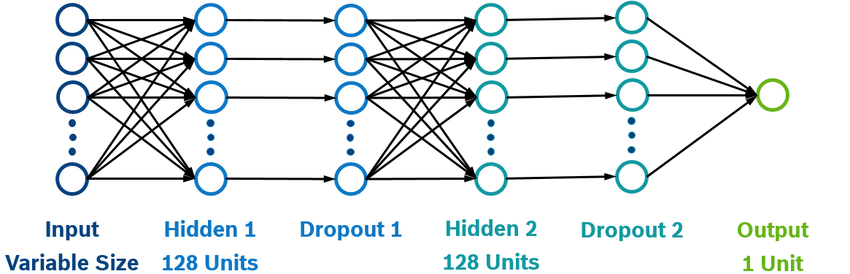

In [ ]:
    modelo = tf.keras.models.Sequential()
    modelo.add(tf.keras.layers.Dense(16, input_dim=1, activation='relu'))
    modelo.add(tf.keras.layers.Dense(1))

modelo.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["mse"])

history = modelo.fit(x, y, epochs=500)

Capas de Keras-TensorFlow: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer

In [4]:
modelo.predict([40])

array([[79.89962]], dtype=float32)

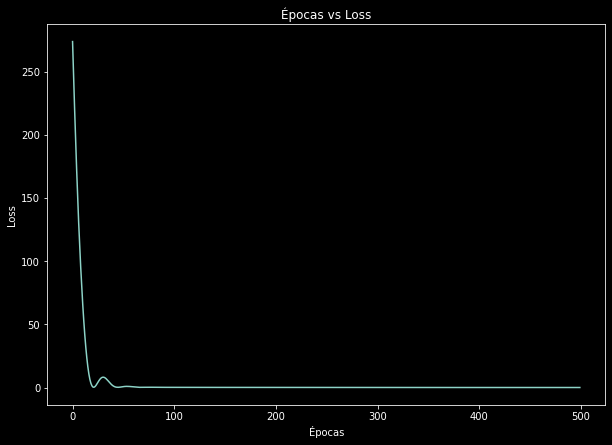

In [5]:
plt.style.use('dark_background')

figura_1 = plt.figure(figsize=(10, 7))
plt.title("Épocas vs Loss")
plt.plot(range(500), history.history["loss"])
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.show()

Para ir haciendo distintas pruebas, empaquetamos todo esto dentro de una única función.

### Creación de funciones

In [7]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import activations

def generar_modelo_MLP(cant_neuronas, activaciones, loss="mse", input_dim=1, 
                       metricas=["mse"], optimizador=optimizers.Adam(0.01)):
  """
  Recibe la cantidad de neuronas. Todas las capas serán Dense.
  
  params:
    cant_neuronas: list = una lista con la cantidad de neuronas por capa.
    activaciones: list = la función activación por cada capa. Si es nula
                        entonces simplemente es la activacion lineal.
    loss = la función de pérdida
    metricas = las métricas a evaluar durante el entrenamiento
    optimizador = el optimizador para el entrenamiento
  """
  modelo = Sequential()
  # para primera capa
  modelo.add(Dense(cant_neuronas[0], input_dim=input_dim, activation=activaciones[0]))

  # para las demás capas
  for i in range(1, len(cant_neuronas)):
    modelo.add(Dense(cant_neuronas[i], activation=activaciones[i]))

  modelo.compile(loss=loss, optimizer=optimizador, metrics=metricas)
  return modelo


def entrenar_y_graficar(x_train, y_train, modelo, epocas=250):
  """
  Función para hacer distintas pruebas rápidas.
  """
  history = modelo.fit(x_train, y_train, epochs=epocas)
  
  plt.style.use('dark_background')
  fig = plt.figure(figsize=(10, 7))
  plt.title("Épocas vs Loss")
  plt.plot(range(epocas), history.history["loss"])
  plt.xlabel("Épocas")
  plt.ylabel("Loss")
  plt.show()
  
  return fig

In [8]:
neuronas = [16, 1]
activaciones = ["relu", "linear"]

modelo_1 = generar_modelo_MLP(cant_neuronas=neuronas, activaciones=activaciones)
modelo_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### Imagen Explicativa de Neurona

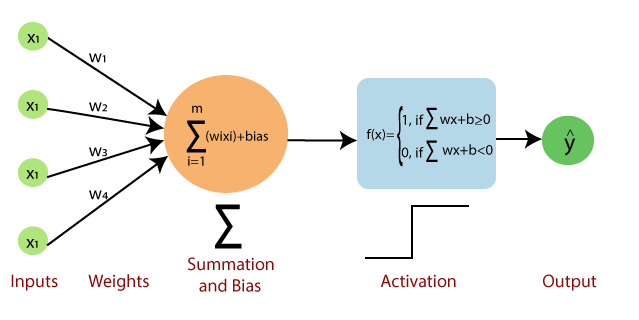

Epoch 1/250
1/1 [==============================] - 1s 960ms/step - loss: 478.9357 - mse: 478.9357
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 461.3297 - mse: 461.3297
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 443.8611 - mse: 443.8611
Epoch 4/250
1/1 [==============================] - 0s 7ms/step - loss: 426.5435 - mse: 426.5435
Epoch 5/250
1/1 [==============================] - 0s 9ms/step - loss: 409.3890 - mse: 409.3890
Epoch 6/250
1/1 [==============================] - 0s 11ms/step - loss: 392.4084 - mse: 392.4084
Epoch 7/250
1/1 [==============================] - 0s 10ms/step - loss: 375.6122 - mse: 375.6122
Epoch 8/250
1/1 [==============================] - 0s 9ms/step - loss: 359.0101 - mse: 359.0101
Epoch 9/250
1/1 [==============================] - 0s 6ms/step - loss: 342.6117 - mse: 342.6117
Epoch 10/250
1/1 [==============================] - 0s 7ms/step - loss: 326.4260 - mse: 326.4260
Epoch 11/250
1/1 [=================

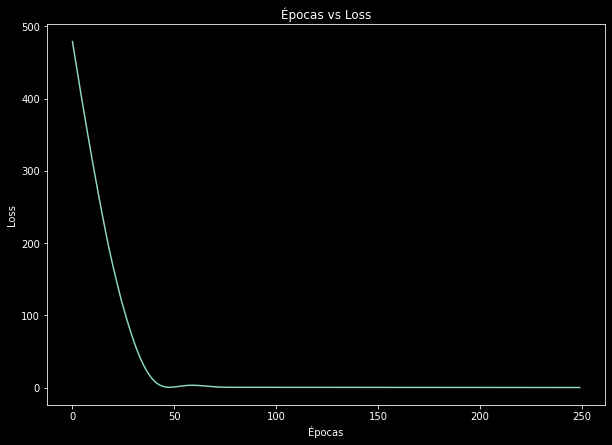

In [9]:
figura_1 = entrenar_y_graficar(x, y, modelo=modelo_1)

### Probamos distintas activaciones


Dejamos la misma cantidad de neuronas y cambiamos las activaciones para visualizar sus efectos.

In [ ]:
activaciones_para_probar = [["relu", "linear"],
                            ["relu", "relu"], 
                            ["relu", "softmax"], 
                            ["softmax", "relu"]]

modelos_1 = [generar_modelo_MLP(neuronas, activ) for activ in activaciones_para_probar]

graficos_1 = [entrenar_y_graficar(x, y, m) for m in modelos_1]

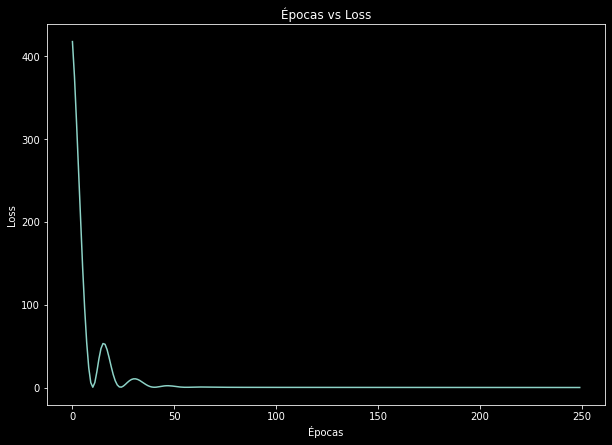

In [10]:
graficos_1[1]

Modelo ['relu', 'linear']


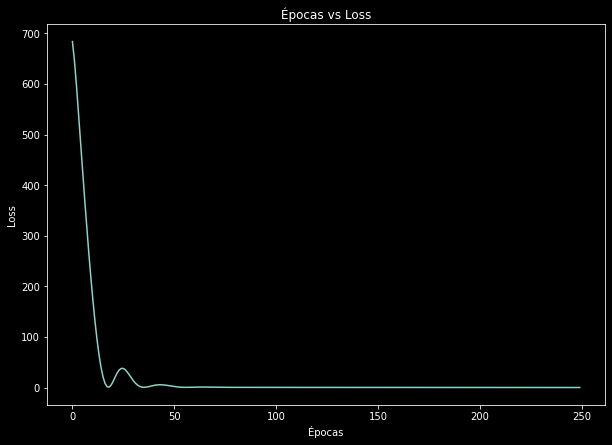

Modelo ['relu', 'relu']


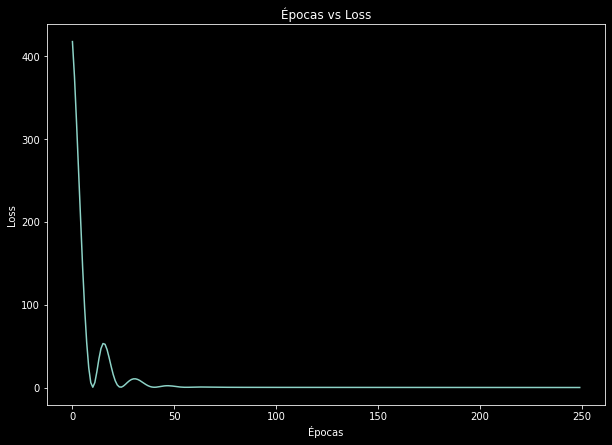

Modelo ['relu', 'softmax']


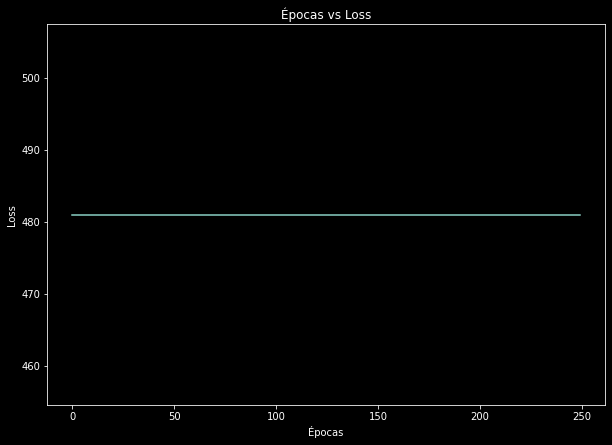

Modelo ['softmax', 'relu']


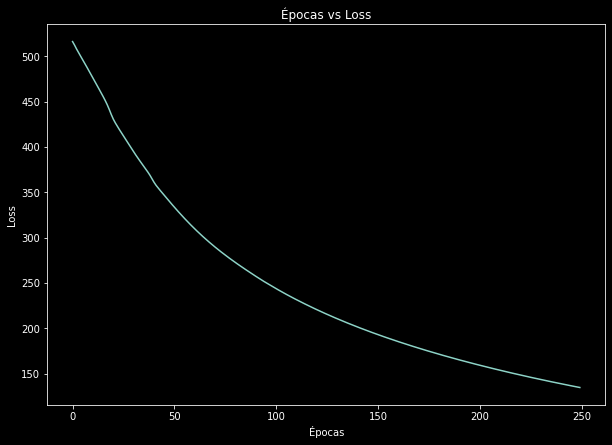

In [11]:
for graf, acts in zip(graficos_1, activaciones_para_probar):
  print(f"Modelo {acts}")
  display(graf)

### Probamos más arquitecturas 

In [10]:
cant_neuronas_1 = [16, 1]
cant_neuronas_2 = [64, 32, 16, 1]
cant_neuronas_3 = [128, 64, 32, 16, 1]
cant_neuronas_4 = [256, 128, 64, 32, 16, 1]

activaciones_1 = ["relu", "linear"]
activaciones_2 = ["relu", "relu", "relu", "relu"]
activaciones_3 = ["relu", "relu", "relu", "relu", "linear"]
activaciones_4 = ["relu", "relu", "relu", "relu", "linear", "softmax"]

cantidades_neuronas = [cant_neuronas_1, cant_neuronas_2, cant_neuronas_3, cant_neuronas_4]
activaciones_capas = [activaciones_1, activaciones_2, activaciones_3, activaciones_4]

Epoch 1/250
1/1 [==============================] - 1s 927ms/step - loss: 489.1724 - mse: 489.1724
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 441.3880 - mse: 441.3880
Epoch 3/250
1/1 [==============================] - 0s 9ms/step - loss: 382.0131 - mse: 382.0131
Epoch 4/250
1/1 [==============================] - 0s 8ms/step - loss: 319.9039 - mse: 319.9039
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 258.4666 - mse: 258.4666
Epoch 6/250
1/1 [==============================] - 0s 7ms/step - loss: 200.4126 - mse: 200.4126
Epoch 7/250
1/1 [==============================] - 0s 8ms/step - loss: 147.5493 - mse: 147.5493
Epoch 8/250
1/1 [==============================] - 0s 7ms/step - loss: 101.2501 - mse: 101.2501
Epoch 9/250
1/1 [==============================] - 0s 7ms/step - loss: 62.6535 - mse: 62.6535
Epoch 10/250
1/1 [==============================] - 0s 7ms/step - loss: 32.7629 - mse: 32.7629
Epoch 11/250
1/1 [=======================

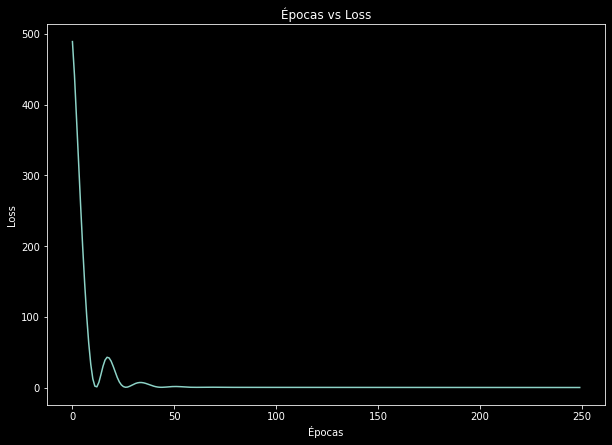

Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 520.0000 - mse: 520.0000
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 520.0000 - mse: 520.0000
Epoch 3/250
1/1 [==============================] - 0s 9ms/step - loss: 520.0000 - mse: 520.0000
Epoch 4/250
1/1 [==============================] - 0s 8ms/step - loss: 520.0000 - mse: 520.0000
Epoch 5/250
1/1 [==============================] - 0s 8ms/step - loss: 520.0000 - mse: 520.0000
Epoch 6/250
1/1 [==============================] - 0s 28ms/step - loss: 520.0000 - mse: 520.0000
Epoch 7/250
1/1 [==============================] - 0s 7ms/step - loss: 520.0000 - mse: 520.0000
Epoch 8/250
1/1 [==============================] - 0s 8ms/step - loss: 520.0000 - mse: 520.0000
Epoch 9/250
1/1 [==============================] - 0s 9ms/step - loss: 520.0000 - mse: 520.0000
Epoch 10/250
1/1 [==============================] - 0s 10ms/step - loss: 520.0000 - mse: 520.0000
Epoch 11/250
1/1 [====================

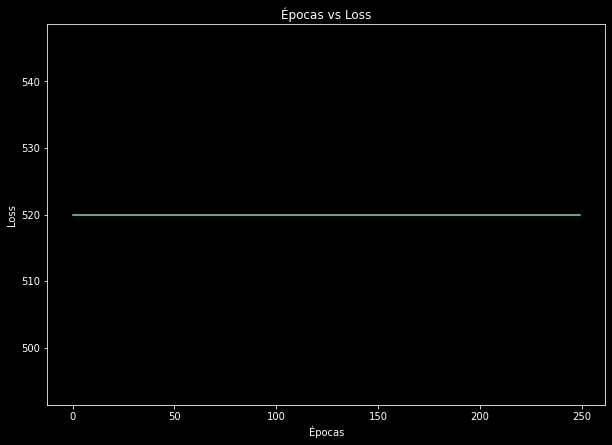

Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 565.6874 - mse: 565.6874
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 457.8272 - mse: 457.8272
Epoch 3/250
1/1 [==============================] - 0s 9ms/step - loss: 218.0010 - mse: 218.0010
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 4.6896 - mse: 4.6896
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 406.8790 - mse: 406.8790
Epoch 6/250
1/1 [==============================] - 0s 7ms/step - loss: 2.1954 - mse: 2.1954
Epoch 7/250
1/1 [==============================] - 0s 8ms/step - loss: 95.3210 - mse: 95.3210
Epoch 8/250
1/1 [==============================] - 0s 6ms/step - loss: 171.4635 - mse: 171.4635
Epoch 9/250
1/1 [==============================] - 0s 6ms/step - loss: 174.5892 - mse: 174.5892
Epoch 10/250
1/1 [==============================] - 0s 8ms/step - loss: 112.1588 - mse: 112.1588
Epoch 11/250
1/1 [==============================] 

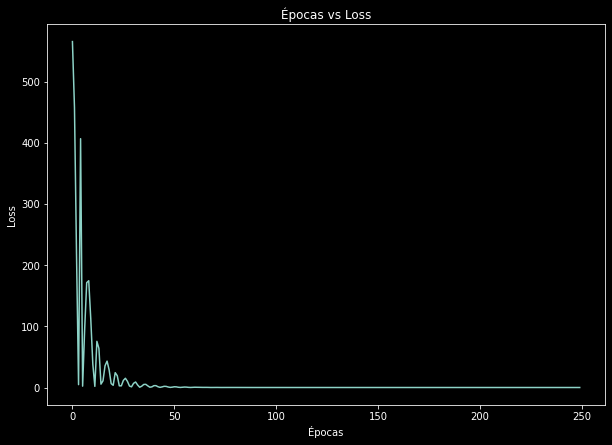

Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 481.0000 - mse: 481.0000
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 481.0000 - mse: 481.0000
Epoch 3/250
1/1 [==============================] - 0s 9ms/step - loss: 481.0000 - mse: 481.0000
Epoch 4/250
1/1 [==============================] - 0s 10ms/step - loss: 481.0000 - mse: 481.0000
Epoch 5/250
1/1 [==============================] - 0s 8ms/step - loss: 481.0000 - mse: 481.0000
Epoch 6/250
1/1 [==============================] - 0s 8ms/step - loss: 481.0000 - mse: 481.0000
Epoch 7/250
1/1 [==============================] - 0s 8ms/step - loss: 481.0000 - mse: 481.0000
Epoch 8/250
1/1 [==============================] - 0s 11ms/step - loss: 481.0000 - mse: 481.0000
Epoch 9/250
1/1 [==============================] - 0s 9ms/step - loss: 481.0000 - mse: 481.0000
Epoch 10/250
1/1 [==============================] - 0s 9ms/step - loss: 481.0000 - mse: 481.0000
Epoch 11/250
1/1 [====================

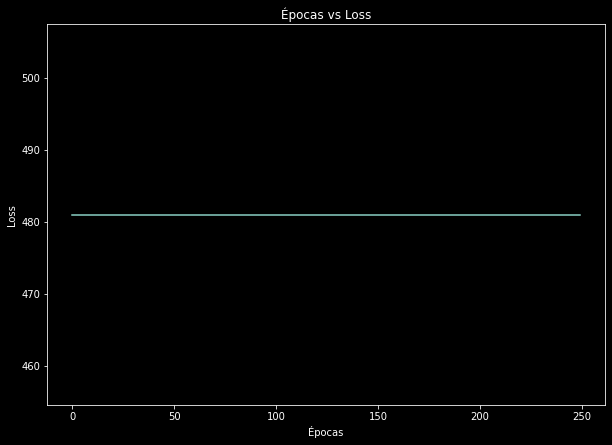

In [11]:
modelos = []
graficos = []

for cant, act in zip(cantidades_neuronas, activaciones_capas):
  modelos.append(generar_modelo_MLP(cant, act))

# entrena y guardo los graficos
for modelo in modelos:
  graficos.append(entrenar_y_graficar(x, y, modelo))

Modelo ['relu', 'linear']


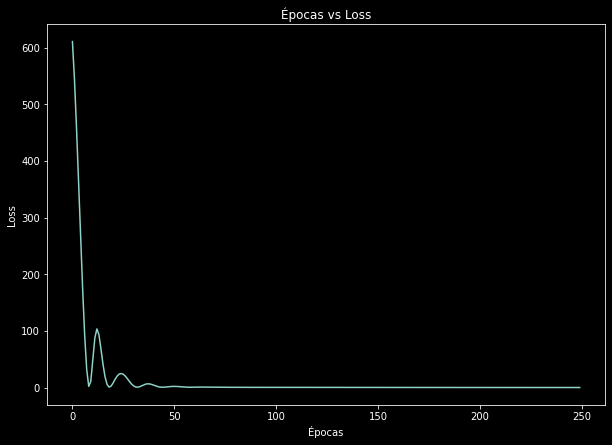

Modelo ['relu', 'relu', 'relu', 'relu']


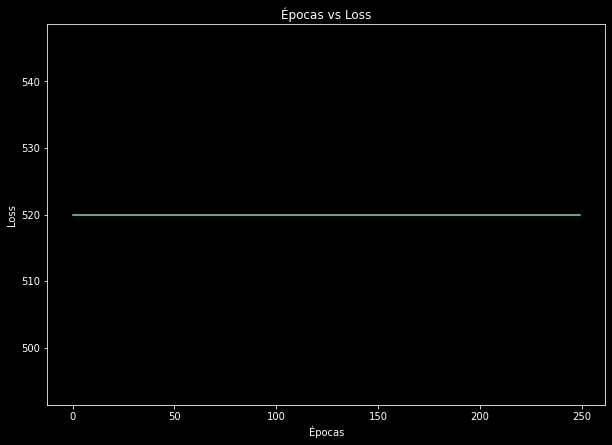

Modelo ['relu', 'relu', 'relu', 'relu', 'linear']


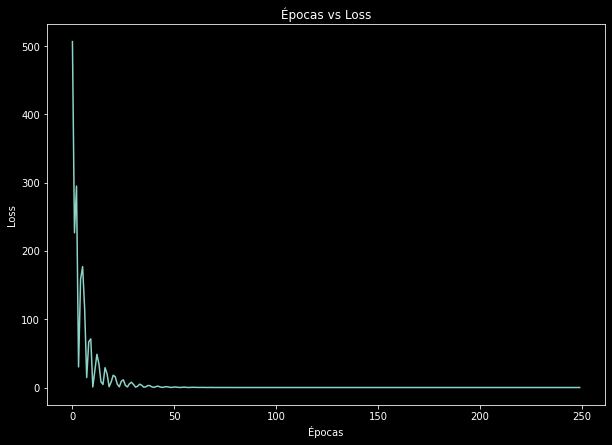

Modelo ['relu', 'relu', 'relu', 'relu', 'linear', 'softmax']


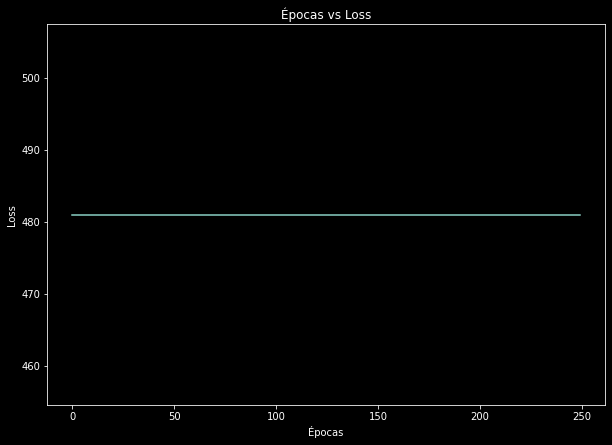

In [14]:
for graf, acts in zip(graficos, activaciones_capas):
  print(f"Modelo {acts}")
  display(graf)

## Clasificación

In [15]:
from sklearn.datasets import make_gaussian_quantiles
N = 1000 # Usamos 1000 ejemplos

# Creamos otros datos
gaussian_quantiles = make_gaussian_quantiles(mean = None, cov=0.1, n_samples=N, n_features=2, 
                                             n_classes=2, shuffle=True, random_state=None) 

X, Y = gaussian_quantiles

In [16]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [17]:
X

array([[-0.53363319,  0.24950853],
       [ 0.35694945, -0.15845453],
       [-0.34990257, -0.62209771],
       ...,
       [ 0.04824342, -0.10658985],
       [-0.20146281,  0.39179226],
       [-0.434603  ,  0.18251959]])

In [18]:
df = pd.DataFrame(data=X, columns=["feature 1", "feature 2"])
df["Y"] = Y
df

,feature 1,feature 2,Y
0,-0.533633,0.249509,1
1,0.356949,-0.158455,1
2,-0.349903,-0.622098,1
3,-0.034713,-0.182419,0
4,0.070297,-0.191567,0
...,...,...,...
995,-0.238512,-0.083696,0
996,-0.069384,0.007649,0
997,0.048243,-0.106590,0
998,-0.201463,0.391792,1


#### Utilizando Pandas para train-test-split

In [19]:
x_train = df.sample(frac=0.8, random_state=0)
x_test = df.drop(x_train.index)

In [20]:
y_train = x_train.pop('Y')
y_test = x_test.pop('Y')

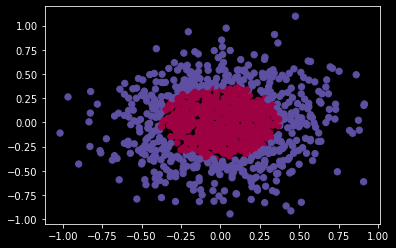

In [21]:
plt.scatter(df["feature 1"], df["feature 2"], c=df["Y"], s=40, cmap=plt.cm.Spectral)
plt.show()

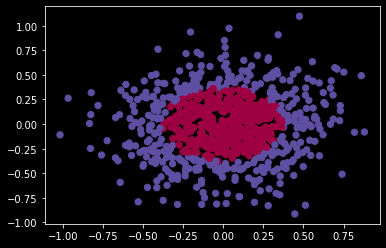

In [22]:
plt.scatter(x_train["feature 1"], x_train["feature 2"], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.show()

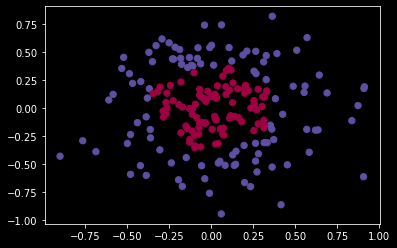

In [23]:
plt.scatter(x_test["feature 1"], x_test["feature 2"], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.show()

In [24]:
model = Sequential()

model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Diferencia entre Softmax y Sigmoid


- Si es multiclase y solo hay una única respuesta correcta (como intentar detectar un número) se usa softmax. Esto es porque las clases son mutuamente excluyentes. 

- Si es multiclase pero las respuestas NO son mutuamente excluyentes, es decir, hay más de una respuesta correcta (por ej: en una radiografía detecto dos enfermedades) se utiliza sigmoid. La sigmoid dará la probabilidad del 0 al 1 independientemente entre ellas.

Notar que la suma de todas las probabilidades por clase de la softmax suma 1, mientras que la suma de todas las probabilidades de sigmoid es incierto.

In [25]:
model.compile(loss="mse", optimizer=optimizers.Adam(), metrics=["mse", "acc"])

In [27]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                192       
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epocas = 100

history = model.fit(x_train, y_train, batch_size=32, epochs=epocas)

In [29]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0066 - mse: 0.0066 - acc: 1.0000


[0.006643671542406082, 0.006643671542406082, 1.0]

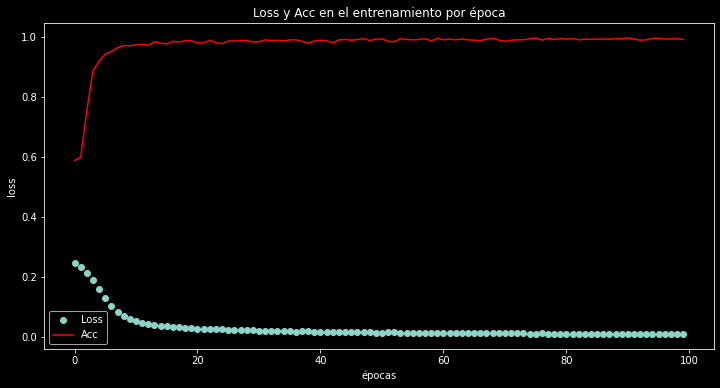

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(range(epocas), history.history["loss"], "o", label="Loss")
plt.plot(range(epocas), history.history["acc"], "r-", label="Acc")
plt.xlabel("épocas")
plt.ylabel("loss")
plt.legend()
plt.title("Loss y Acc en el entrenamiento por época")
plt.show()

In [31]:
preds = model.predict(x_test)
preds[:10]

array([[9.9999988e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.3236305e-03],
       [9.9771392e-01],
       [3.2514319e-05],
       [1.0000000e+00],
       [1.5555144e-02],
       [9.9985909e-01],
       [1.0000000e+00]], dtype=float32)

Notar que el modelo devuelve siempre la probabilidad de que sea 1 o 0.

In [32]:
valores_predichos = np.where(preds > 0.5, 1, 0)
valores_predichos[:10]

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

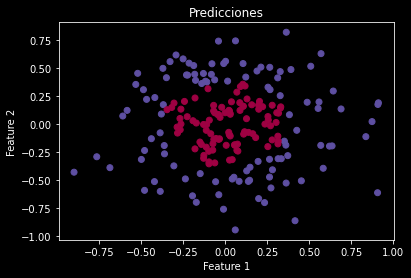

In [33]:
plt.scatter(x_test["feature 1"], x_test["feature 2"], c=valores_predichos, cmap=plt.cm.Spectral)
plt.title("Predicciones")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

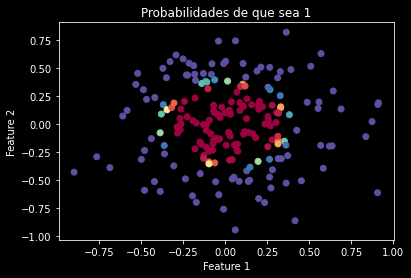

In [34]:
plt.scatter(x_test["feature 1"], x_test["feature 2"], c=preds, cmap=plt.cm.Spectral)
plt.title("Probabilidades de que sea 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [35]:
df_test = pd.DataFrame(x_test)
df_test["label"] = y_test
df_test["predicciones"] = valores_predichos
df_test

,feature 1,feature 2,label,predicciones
9,0.273265,-0.569464,1,1
11,0.909757,0.175391,1,1
19,0.364385,0.819742,1,1
23,-0.179147,-0.221028,0,0
28,-0.081621,0.444013,1,1
...,...,...,...,...
962,-0.039279,0.740691,1,1
966,0.559234,0.197717,1,1
976,0.026770,-0.321155,0,0
980,-0.438752,-0.130096,1,1


## Actividad: Fashion MNIST

1. Cargar el dataset
2. Hacer un análisis del dataset
3. Jugar con el tutorial https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
4. Buscar significado de las cosas que se van haciendo.
5. Investigar qué hace la capa Flatten que usa en el ejemplo.
6. Graficar métricas, cambien hiperparámetros.
7. Preguntense entre ustedes y pregunten a nosotros. 